## Simulación 1 || Vargas Nancy
Estadística y Probabilidades. || Comisión E

# **La Paradoja del Cumpleaños**

> Agregar bloque entrecomillado



***Objetivo:*** Simulamos la famosa **Paradoja del Cumpleaños** usando Python.  
La pregunta que respondemos es:

**¿Cuántas personas deben estar en una sala para que la probabilidad de que al menos dos compartan cumpleaños sea del 50% o más?**

Para esta simulación asumimos:
* El año tiene 365 días (sin contar años bisiestos).
* Todos los cumpleaños son igualmente probables.



In [ ]:
import random
import matplotlib.pyplot as plt
import math


In [ ]:
def hay_cumpleaños_repetido(n_personas):
  """Simula si hay al menos dos personas con el mismo cumpleaños"""
  #Se genera una lista con n_personas elementos donde cada elemento representa
  #el resultado de la variable aleatoria día que puede ir de 1 a 365
  cumpleaños = [random.randint(1,365) for _ in range(n_personas)]
  #Devuelve un booleano donde es verdadero si se repite el cumpleaños y falso si no se repite.
  #Esto se debe a que compara el tamaño de la lista cumpleaños
  # con el del conjunto set(cumpleaños). Si son diferentes, fechas repetidas, los tamaños son distintos
  # y devuelve verdadero.
  return len(cumpleaños) != len(set(cumpleaños))



In [ ]:
def calcular_probabilidad(n_personas, repeticiones=10000):
  """Simula la probabilidad de que al menos dos personas en un grupo de n_personas compartan cumpleaños"""
  #Se repite el experimento dado en la función hay_cumpleaños_repetido tantas veces como el valor
  #de la variable repeticiones.
  #Se va acumulando los resultados positivos y la probabilidad se estima como la cantidad de los
  #casos positivos sobre los casos totales.
  cuenta = 0
  for _ in range(repeticiones):
    if hay_cumpleaños_repetido(n_personas):
      cuenta += 1
  return cuenta / repeticiones

In [ ]:
def prob_teorica(n):
    """Calcula la probabilidad teórica de que al menos dos personas compartan cumpleaños en un grupo de n personas."""
    #Para esto, se aplica el concepto de probabilidad complementaria. La probabilidad calculada
    #se obtiene como la resta entre 1 y la probabilidad que pase el escenario opuesto, es decir,
    #que todas las personas cumplan el mismo día.

    prob = 1.0
    for i in range(n):
        prob *= (365 - i) / 365
    return 1 - prob

### ***Calcular la probabilidad***
Se grafica la probabilidad estimada de que al menos dos personas cumplan el mismo día en función del número de personas


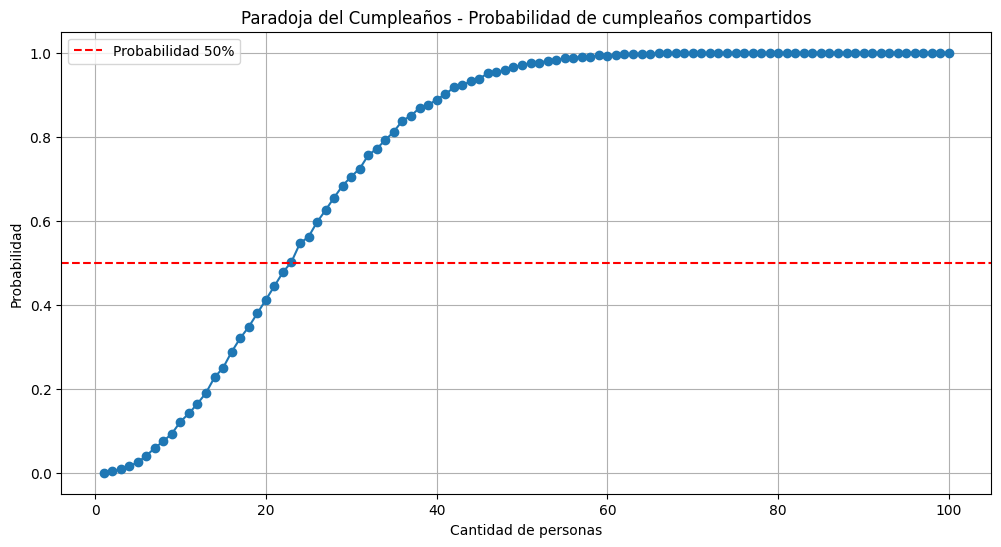

In [ ]:
resultados = []
grupos = list(range(1, 101))

for n in grupos:
  prob = calcular_probabilidad(n)
  resultados.append(prob)


plt.figure(figsize=(12, 6))
plt.plot(grupos,resultados, marker='o')
plt.axhline(y=0.5, color='r', linestyle='--', label='Probabilidad 50%')
plt.title('Paradoja del Cumpleaños - Probabilidad de cumpleaños compartidos')
plt.xlabel('Cantidad de personas')
plt.ylabel('Probabilidad')
plt.grid(True)
plt.legend()
plt.show()

### ***Resultados:***
* Este experimento muestra que con aproximadamente **23 personas**, la probabilidad de que **al menos dos compartan cumpleaños** supera el 50%.

* Esto puede parecer sorprendente, pero se basa en cómo crecen las combinaciones posibles entre pares de personas.

* A medida que aumentamos la cantidad de personas, la probabilidad crece rápidamente.

* Con 50 personas, la probabilidad supera el 90%.

### ***Supuestos:***
* No se cuentan años bisiestos.
* Se supone que todas las fechas son igualmente probables.

Este ejercicio es un ejemplo de cómo **la probabilidad no siempre es intuitiva**.

## **Comparación con la fórmula teórica.**

Además de realizar la simulación de la Paradoja del Cumpleaños, se agrega una función que permite calcular la **probabilidad teórica exacta** de que al menos dos personas compartan cumpleaños.

Esta fórmula se basa en calcular la probabilidad de que todas las personas tengan cumpleaños distintos, y luego restarle a 1 ese valor para obtener la probabilidad de coincidencia.


Cuando tenemos un grupo de **n personas**, queremos calcular la **probabilidad de que al menos dos compartan el mismo cumpleaños**. Para eso, primero analizamos el caso contrario: la probabilidad de que **todas cumplan en días distintos**.

1. La primera persona (**i = 0**) puede cumplir años en cualquiera de los 365 días del año, así que tiene **365 opciones posibles**.

2. La segunda persona (**i = 1**) debe cumplir en un día distinto al de la primera, por lo que tiene **364 días disponibles**.

3. La tercera persona (**i = 2**) debe evitar los cumpleaños de las dos anteriores, así que tiene **363 opciones**.

Y así sucesivamente. En general, la persona número **i+1** tiene **(365 − i)** días posibles.

Entonces, la cantidad de formas en que **i+1 personas pueden tener todos sus cumpleaños en días distintos** es:

$$
365 \times 364 \times 363 \times \dots \times (365 - i)
$$

Por otro lado, si no hubiese ninguna restricción (es decir, si todos pudieran cumplir años en cualquier día del año), habría:

$$
365^{i+1}
$$

posibles combinaciones de cumpleaños.

Por lo tanto, la **probabilidad de que i+1 personas tengan cumpleaños todos en días distintos** es:

$$
p = \frac{365 \times 364 \times 363 \times \dots \times (365 - i)}{365^{i+1}}
$$

Y finalmente, la **probabilidad de que al menos dos personas compartan cumpleaños** es el complemento de ese valor:

$$
1 - p
$$





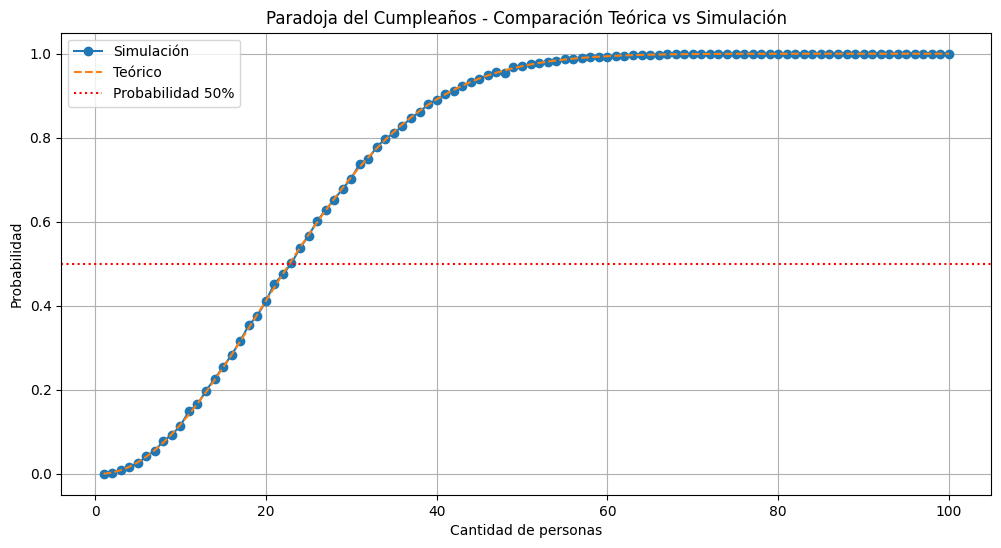

In [ ]:
resultados_simulacion = []
resultados_teoricos = []
grupos = list(range(1, 101))

for n in grupos:
    resultados_simulacion.append(calcular_probabilidad(n))
    resultados_teoricos.append(prob_teorica(n))

plt.figure(figsize=(12, 6))
plt.plot(grupos, resultados_simulacion, label='Simulación', marker='o')
plt.plot(grupos, resultados_teoricos, label='Teórico', linestyle='--')
plt.axhline(y=0.5, color='r', linestyle=':', label='Probabilidad 50%')
plt.title('Paradoja del Cumpleaños - Comparación Teórica vs Simulación')
plt.xlabel('Cantidad de personas')
plt.ylabel('Probabilidad')
plt.legend()
plt.grid(True)
plt.show()



## Conclusiones

Se compararon los resultados de la simulación con los de la fórmula teórica. El buen acuerdo entre el modelo teórico y los resultados de la simulación confirman que la simulación numérica es un método eficaz para estimar la probabilidad pedida en función del número de personas. Se concluye que con aproximadamente 23 personas la probabilidad de que al menos 2 cumplan el mismo día es mayor a 50 porciento.
